# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 31     |  |
| :-------------|:-------------|
| Student Julia van der Maaten| Student 6505937|
| Student Thomas de Ruyter van Steveninck | Student 6528255 |
| Student Lieke Boontjes| Student 65437155 |

| Planning Groep: 31     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | voor de lunch |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 14:30 |
| Pauze 1| 12:30-13:30 |
| Pauze 2| Tijdspanne |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Schetsen.jpg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|druksensor | aantal mensen in collegezaal tellen door druk op stoelen te meten | 1) Hij moet kunnen meten of er iets of niets op de stoel zit 2) verschil tussen wel of niet iemand zit en dus ook onderscheid tussen persoon 70 kg en tas 10 kg bijvoorbeeld 3) Hij moet elke stoel appart kunnen meten
|tempratuursensor | koortsmeten | 1) verschil tussen normaal lichaamstempratuur en tempratuur bij koorts 2)Hij moet niet worden beinvloed door de zon 3) de omgefvingtempratuur mag geen invloed hebben |
|lichtsensor |automatisch nachtlampje | 1)bij donker gaat het lichtje aan, verschil tussen echt donker en schemer donker 2) Niet een schommelde waarde geven, anders gaat het lampje knipperen 3) hoe donkerder de kamer hoe minder fel licht en bij schemer is het lampje feller|
 

Groep 31 heeft gekozen voor sensor druksensor. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Opstelingsschets2.jpg "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? gewicht op de plank
2. Over welk bereik ga je deze variabelen veranderen? 0-60 kg
3. Wat ga je allemaal meten?  persoon (60kg), tas(10 kg), niks.
4. Hoeveel metingen ga je doen? 3 of 4
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? ja


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Meetopstelling.jpg "meetopstelling student")
 Hierin is de meetopstleling te zien, de druksensoir in hierbij tussen 2 planken geplaatst 

Opmerking: we zijn gewisseld van het meten of er een persoon op de stoel zit naar maken van een weegschaal omdat er geen weegschaal beschikbaar was om te kunnen kalibreren boven de 610 g. 

Meetplan:
1. Welke variabelen ga je veranderen? gewicht op de plank/weegschaal
2. Over welk bereik ga je deze variabelen veranderen? 0-500 g
3. Wat ga je allemaal meten? van 0 tot 500 gram in intervallen van 50g.
4. Hoeveel metingen ga je doen? 11 metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? ja


## *Opdracht 6*: Meten en fitten, Leerdoel

In [ ]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

gewichten = np.array([0, 50, 102.48, 156, 201.13, 249.83, 304.75, 358.8, 404.98, 447.16, 504.67, 554.87]) #g
arduino = np.array([1023, 1018, 1010, 998, 990, 976, 965, 942, 916, 892, 863, ])

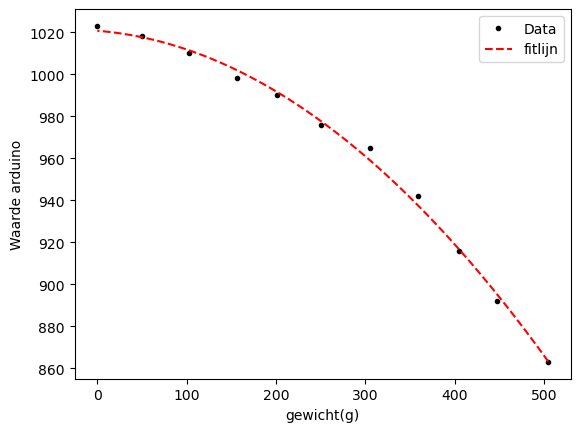

In [46]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline

def fitfunctie(x, a, b, c):
    return a * x**2 + b * x + c

vals, covals = curve_fit(fitfunctie, gewichten, arduino)

x_test = np.linspace(max(gewichten), min(gewichten), 1000)

plt.figure()
plt.plot(gewichten, arduino, 'k.', label="Data")
plt.plot(x_test, fitfunctie(x_test, *vals),'r--',label='fitlijn')
plt.xlabel("gewicht(g)")
plt.ylabel("Waarde arduino")
plt.legend()
plt.show()

## *Opdracht 7*: Iteratie nodig?

Vervang deze tekst door jouw antwoord.

## *Opdracht 8*: Conclusie, leerdoel

Vervang deze tekst door jouw conclusie. 

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 3 beheersen.